# Covid-19 (Coronavirus) 
## Tracker for Locations with Friends & Family

Note - All data was gathered and prepared on the [Covid19_Data_ETL.ipynb](https://github.com/BrianLeip/CoronaVirus/blob/master/Covid19_Data_ETL.ipynb) notebook prior to loading into this notebook, following standard best practices for data analytics.

## Data Sources

### Primary Data Source: Johns Hopkins CSSE Data Repository 
- Link: https://github.com/CSSEGISandData/COVID-19  
- **Live data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US County (cases, deaths)
- **Historic time series data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US Counties (cases, deaths)

### --PENDING-- US State Testing and Hospitalizations: Covid Tracking Project 
- Link: https://covidtracking.com/data/ 
- **Live data:**
    - US State testing and hopspitalization, ICU stats --PENDING--
- **Historic time series data:**
    - US State testing and hopspitalization, ICU stats --PENDING--

### --PENDING-- US County - Alternative: NY Times
- Link: https://github.com/nytimes/covid-19-data/
- **Historic time series data:**
    - US States (cases, deaths) --PENDING--
    - US Counties (cases, deaths) --PENDING--

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import os
import seaborn as sns
sns.set()

## Load the Data
See the Covid19_Data_ETL notebook for info on the data gathering and wrangling process.  
All original data left unchanged, only the format was changed to make it preferable to work with for EDA and Data Viz

### Dataset 1: John Hopkins

In [2]:
jh_live_global = pd.read_csv('Datasets/JH/jh_live_global_orig.csv')

In [3]:
jh_live_countries = pd.read_csv('Datasets/JH/jh_live_countries.csv', index_col=0)

In [4]:
jh_live_usstates = pd.read_csv('Datasets/JH/jh_live_usstates.csv', index_col=0)

In [5]:
jh_live_uscounties = pd.read_csv('Datasets/JH/jh_live_uscounties.csv', index_col=[0,1])

In [6]:
jh_hist_countries_cases = pd.read_csv('Datasets/JH/jh_hist_countries_cases.csv', index_col=0, parse_dates=True)

In [7]:
jh_hist_countries_deaths = pd.read_csv('Datasets/JH/jh_hist_countries_deaths.csv', index_col=0, parse_dates=True)

In [8]:
jh_hist_countries_recovered = pd.read_csv('Datasets/JH/jh_hist_countries_recovered.csv', index_col=0, parse_dates=True)

In [9]:
jh_hist_usstates_cases = pd.read_csv('Datasets/JH/jh_hist_usstates_cases.csv', index_col=0, parse_dates=True)

In [10]:
jh_hist_usstates_deaths = pd.read_csv('Datasets/JH/jh_hist_usstates_deaths.csv', index_col=0, parse_dates=True)

In [11]:
jh_hist_uscounties_cases = pd.read_csv('Datasets/JH/jh_hist_uscounties_cases.csv', index_col=0, header=[0,1], parse_dates=True)

In [12]:
jh_hist_uscounties_deaths = pd.read_csv('Datasets/JH/jh_hist_uscounties_deaths.csv', index_col=0, header=[0,1], parse_dates=True)

### Dataset 2: Covid Tracking Project

** PENDING **

### Dataset 3: New York Times (Alternative Historic US State & County data)

** PENDING **

## Prep Some Commonly Used Data (e.g. current date for each dataset)

In [13]:
jh_live_date = jh_live_global['Last_Update'][0]
jh_live_date = pd.to_datetime(jh_live_date)
jh_live_date = pd.Timestamp(jh_live_date.year, jh_live_date.month, jh_live_date.day)
jh_live_date

Timestamp('2020-04-20 00:00:00')

In [14]:
jh_hist_date = jh_hist_countries_cases.index[-1]
jh_hist_date

Timestamp('2020-04-20 00:00:00')

In [15]:
# Date to zoom in on for charting recent data
zoom_date = '3/15/2020'
zoom_date2 = '3/20/2020'
zoom_date3 = '3/25/2020'

## Exploratory Data Analysis (EDA)

### Global and Country Level

In [16]:
# Total Global confirmed cases, deaths, recovered, and active (live)
pd.DataFrame(jh_live_countries[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum() )

,0
Confirmed,2472259
Deaths,169986
Recovered,645738
Active,1656535


In [17]:
# Top countries by confirmed count as of latest date
top_countries = jh_live_countries.nlargest(25, 'Confirmed')
top_countries.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Country_Region,,,,,,,
US,784326,42094,72329,669903,2020-04-20 23:44:33,38.103887,-90.808138
Spain,200210,20852,80587,98771,2020-04-20 23:36:27,40.463667,-3.749220
Italy,181228,24114,48877,108237,2020-04-20 23:36:27,41.871940,12.567380
France,156480,20292,38036,98152,2020-04-20 23:36:27,8.314863,-21.695174
Germany,147065,4862,91500,50703,2020-04-20 23:36:27,51.165691,10.451526


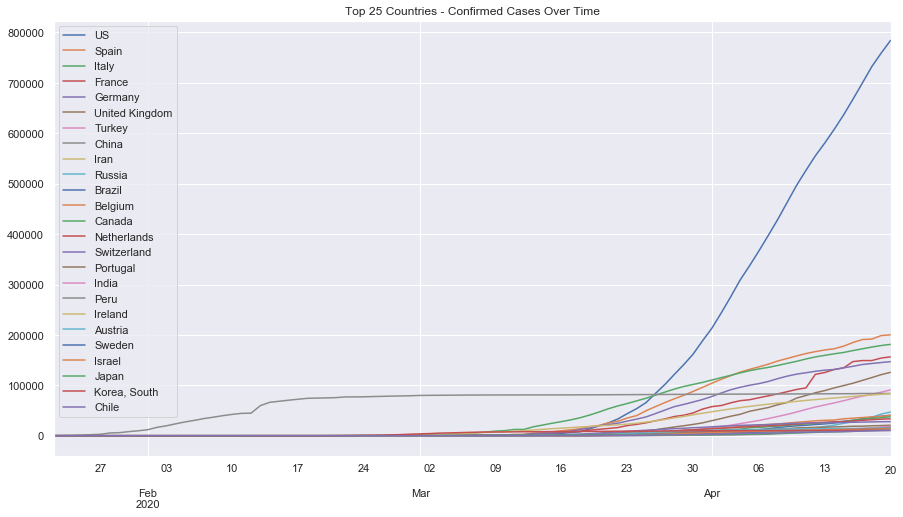

In [18]:
# Plot the top 25 countries confirmed infections over time
jh_hist_countries_cases[top_countries.index].plot(figsize=(15,8), title="Top 25 Countries - Confirmed Cases Over Time")

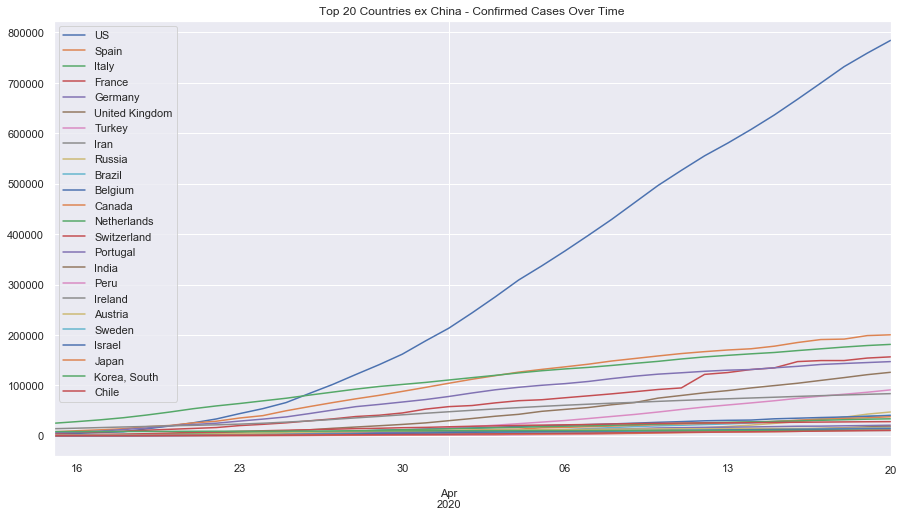

In [19]:
# Same chart but excluding China and starting on Mar 15 to zoom in
jh_hist_countries_cases[top_countries.index].loc[zoom_date:, top_countries.index != 'China'].plot(figsize=(15,8), title="Top 20 Countries ex China - Confirmed Cases Over Time")

### US State Level

In [20]:
# Top US States by confirmed cases
top_states = jh_live_usstates.nlargest(20, 'Confirmed')
top_states.head(10)

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Province_State,,,,,,,
New York,253060,18611,0,234449,2020-04-20 23:36:47,42.671593,-75.579694
New Jersey,88722,4496,0,84226,2020-04-20 23:36:47,40.286441,-74.622450
Massachusetts,38077,1706,0,36371,2020-04-20 23:36:47,42.176400,-71.577050
Pennsylvania,33914,1348,0,32566,2020-04-20 23:36:47,40.818078,-77.615318
California,33686,1225,0,32461,2020-04-20 23:36:47,37.639262,-120.705629
Michigan,32000,2468,0,29532,2020-04-20 23:36:47,43.942073,-85.081655
Illinois,31513,1349,0,30164,2020-04-20 23:36:47,39.915690,-89.189408
Florida,27059,822,0,26237,2020-04-20 23:36:47,28.940755,-82.700744
Louisiana,24523,1328,0,23195,2020-04-20 23:36:47,31.092427,-91.824187


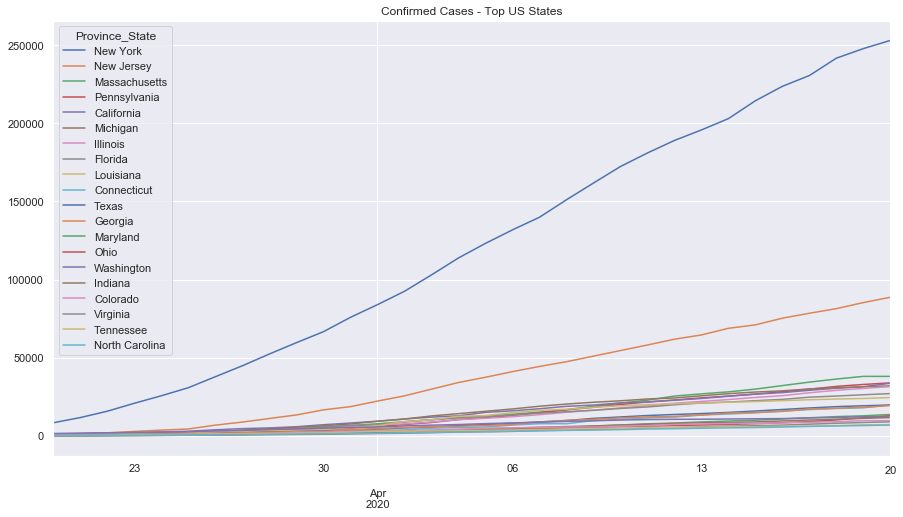

In [21]:
# Chart the top states with confirmed positive
jh_hist_usstates_cases.loc[zoom_date2:, top_states.index].plot(title='Confirmed Cases - Top US States', figsize=(15,8))

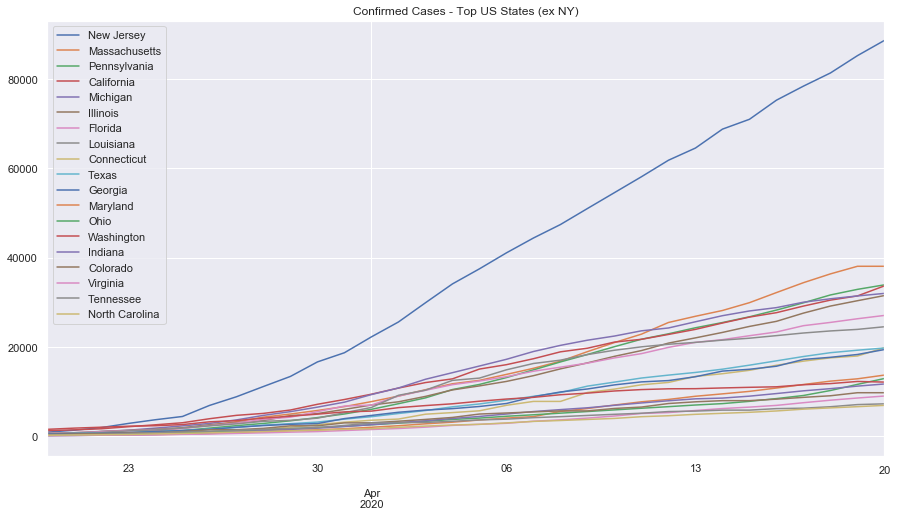

In [22]:
# The same chart but this time without NY to zoom in on the others
jh_hist_usstates_cases[top_states.index].loc[zoom_date2:, top_states.index != 'New York'].plot(title='Confirmed Cases - Top US States (ex NY)', figsize=(15,8))

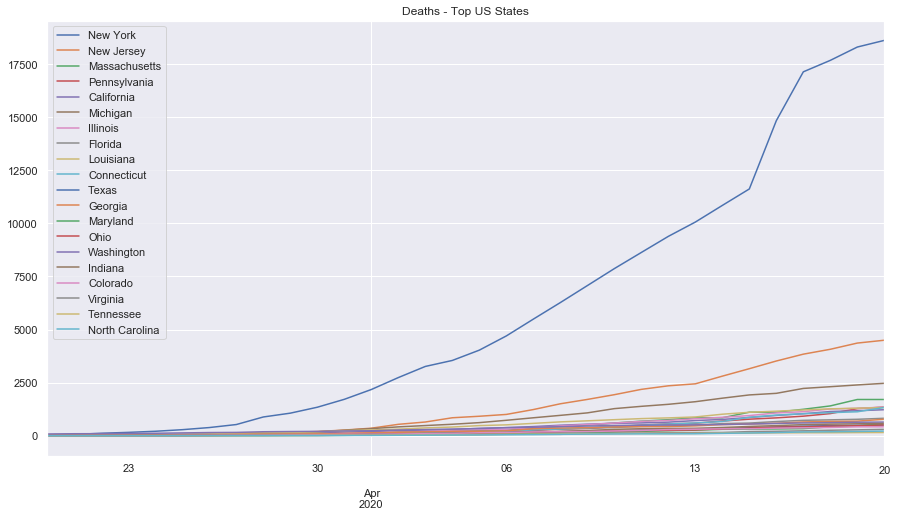

In [23]:
# Chart the top states of by # of deaths
jh_hist_usstates_deaths[top_states.index].loc[zoom_date2:, :].plot(title='Deaths - Top US States', figsize=(15,8))

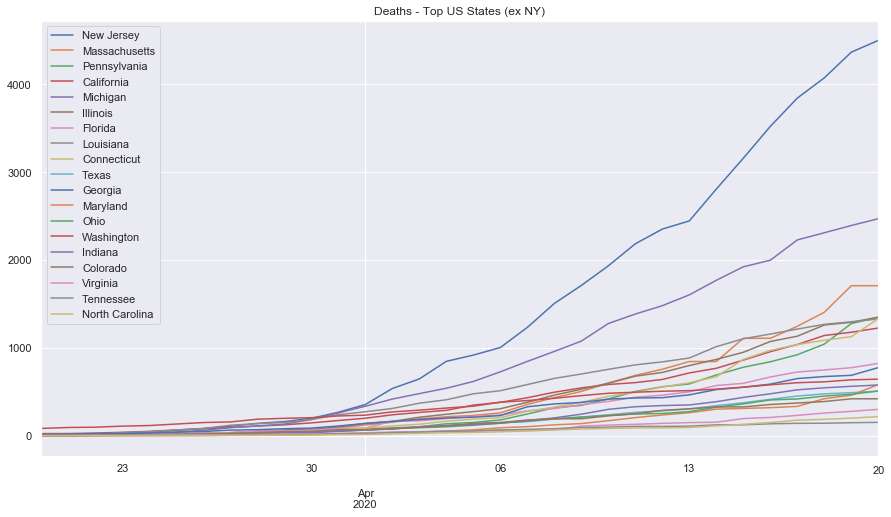

In [24]:
# The same chart but this time without NY to zoom in on the others
jh_hist_usstates_deaths[top_states.index].loc[zoom_date2:, top_states.index != 'New York'].plot(title='Deaths - Top US States (ex NY)', figsize=(15,8))

### US County Level

In [25]:
top_counties_MA = jh_live_uscounties.loc['Massachusetts'].nlargest(10, 'Confirmed')
top_counties_MA.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Middlesex,8737,372,0,8365,2020-04-20 23:36:47,42.486077,-71.390492,25017.0
Suffolk,8074,236,0,7838,2020-04-20 23:36:47,42.327951,-71.078504,25025.0
Essex,5153,209,0,4944,2020-04-20 23:36:47,42.668763,-70.946872,25009.0
Norfolk,3789,244,0,3545,2020-04-20 23:36:47,42.160731,-71.205304,25021.0
Worcester,3069,114,0,2955,2020-04-20 23:36:47,42.350270,-71.904934,25027.0


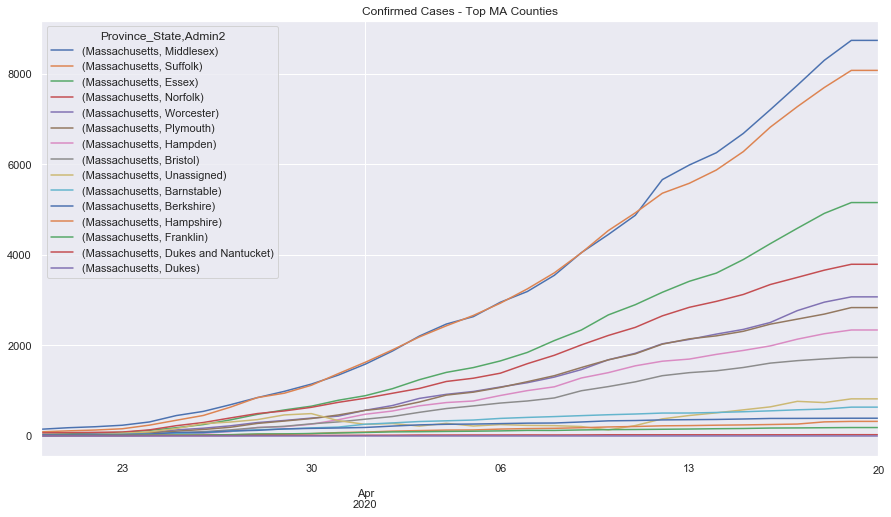

In [26]:
# Chart the MA Counties confirmed cases over time
top_counties_MA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('Massachusetts')].nlargest(15).index
top_counties_MA_cases = jh_hist_uscounties_cases.loc[zoom_date2:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_cases.plot(title='Confirmed Cases - Top MA Counties', figsize=(15,8))

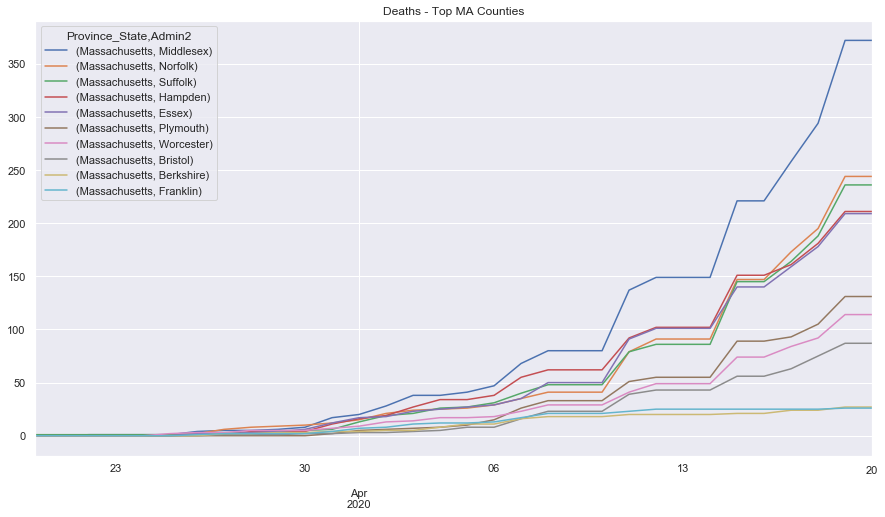

In [27]:
# Chart the MA County deaths over time
top_counties_MA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('Massachusetts')].nlargest(10).index
top_counties_MA_deaths = jh_hist_uscounties_deaths.loc[zoom_date2:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_deaths.plot(title='Deaths - Top MA Counties', figsize=(15,8))

In [28]:
top_counties_CA = jh_live_uscounties.loc['California'].nlargest(15, 'Confirmed')
top_counties_CA.head(7)

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Los Angeles,13823,619,0,13204,2020-04-20 23:36:47,34.308284,-118.228241,6037.0
Riverside,2847,85,0,2762,2020-04-20 23:36:47,33.743150,-115.993358,6065.0
San Diego,2268,71,0,2197,2020-04-20 23:36:47,33.034846,-116.736533,6073.0
Santa Clara,1922,83,0,1839,2020-04-20 23:36:47,37.231049,-121.697046,6085.0
Orange,1676,33,0,1643,2020-04-20 23:36:47,33.701475,-117.764600,6059.0
San Bernardino,1406,60,0,1346,2020-04-20 23:36:47,34.840603,-116.177469,6071.0
San Francisco,1216,20,0,1196,2020-04-20 23:36:47,37.752151,-122.438567,6075.0


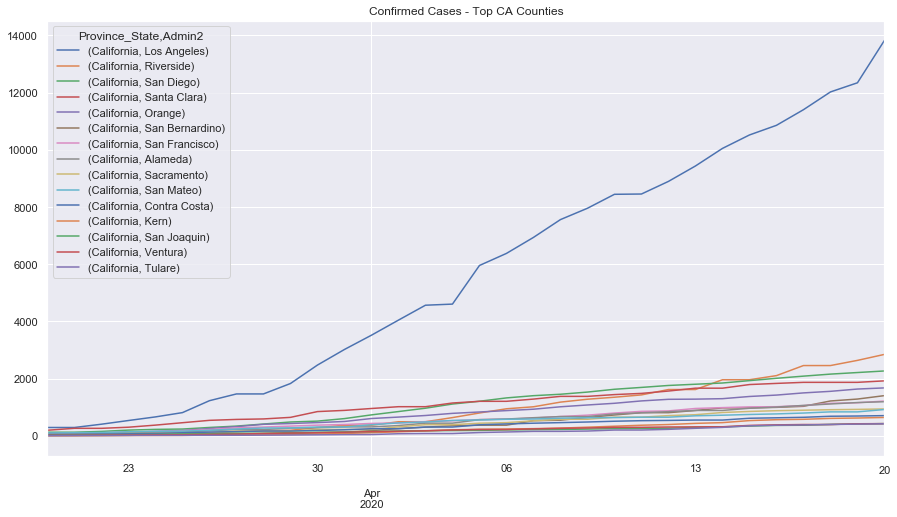

In [29]:
# Chart the CA Counties confirmed cases over time
top_counties_CA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('California')].nlargest(15).index
top_counties_CA_cases = jh_hist_uscounties_cases.loc[zoom_date2:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_cases.plot(title='Confirmed Cases - Top CA Counties', figsize=(15,8))

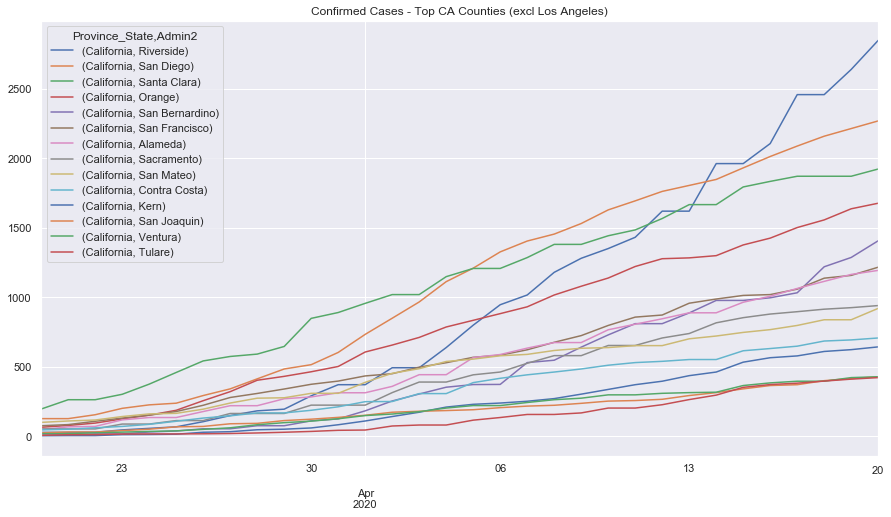

In [30]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_cases = top_counties_CA_cases.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_cases.plot(title='Confirmed Cases - Top CA Counties (excl Los Angeles)', figsize=(15,8))

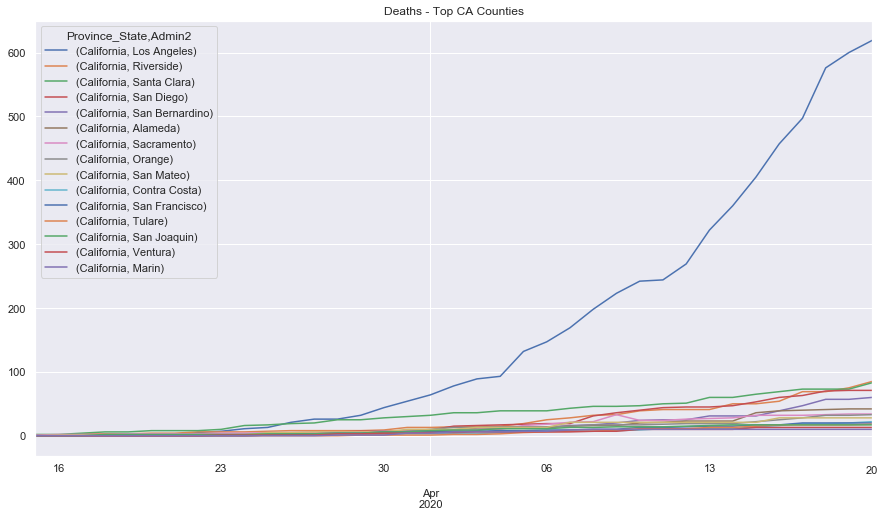

In [31]:
# Chart the CA Counties deaths over time
top_counties_CA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('California')].nlargest(15).index
top_counties_CA_deaths = jh_hist_uscounties_deaths.loc[zoom_date:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_deaths.plot(title='Deaths - Top CA Counties', figsize=(15,8))

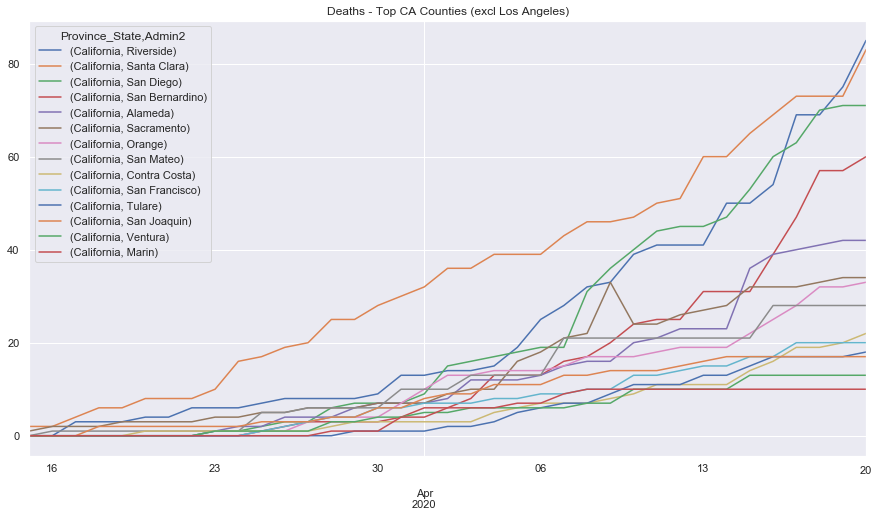

In [32]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_deaths = top_counties_CA_deaths.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_deaths.plot(title='Deaths - Top CA Counties (excl Los Angeles)', figsize=(15,8))

### US Counties - Friends & Family

In [33]:
fnf_counties = [('California', 'Orange'), ('Massachusetts', 'Middlesex'), ('Massachusetts', 'Suffolk'), 
                ('Massachusetts', 'Essex'), ('Massachusetts', 'Bristol')]

#### Live stats for locations where friends and family live

In [34]:
# Add live stats from US Counties of friends & family
fnf_live = jh_live_uscounties.loc[fnf_counties, :]
fnf_live = fnf_live.drop('FIPS', axis=1)

In [35]:
# Add live stats from Costa Rica from the Countries dataset
fnf_cr = jh_live_countries.loc[['Costa Rica']]

In [36]:
# Merge Costa Rica data with US County data
fnf_live.loc[('Costa Rica')] = fnf_cr.loc[('Costa Rica')]

In [37]:
# Display all live data
fnf_live

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
"(California, Orange)",1676,33,0,1643,2020-04-20 23:36:47,33.701475,-117.764600
"(Massachusetts, Middlesex)",8737,372,0,8365,2020-04-20 23:36:47,42.486077,-71.390492
"(Massachusetts, Suffolk)",8074,236,0,7838,2020-04-20 23:36:47,42.327951,-71.078504
"(Massachusetts, Essex)",5153,209,0,4944,2020-04-20 23:36:47,42.668763,-70.946872
"(Massachusetts, Bristol)",1731,87,0,1644,2020-04-20 23:36:47,41.792284,-71.108722
Costa Rica,662,6,124,532,2020-04-20 23:36:27,9.748900,-83.753400


#### Confirmed cases over time in locations where friends and family live

In [38]:
# Add confirmed cases from US Counties of friends & family
fnf_hist_cases = jh_hist_uscounties_cases.loc[:, fnf_counties ]

In [39]:
# Add confirmed cases in Costa Rica from the Countries dataset
fnf_hist_cases[('Costa Rica', '')] = jh_hist_countries_cases['Costa Rica']

In [40]:
# Check the most recent 5 days
fnf_hist_cases.tail()

Province_State California Massachusetts                       Costa Rica
Admin2             Orange     Middlesex Suffolk Essex Bristol           
2020-04-16           1425          7206    6820  4245    1605        642
2020-04-17           1501          7744    7272  4584    1659        649
2020-04-18           1556          8297    7696  4914    1698        655
2020-04-19           1636          8737    8074  5153    1731        660
2020-04-20           1676          8737    8074  5153    1731        662

In [41]:
# Sort in descending order
fnf_hist_cases.sort_values(jh_hist_date, axis=1, ascending=False, inplace=True)

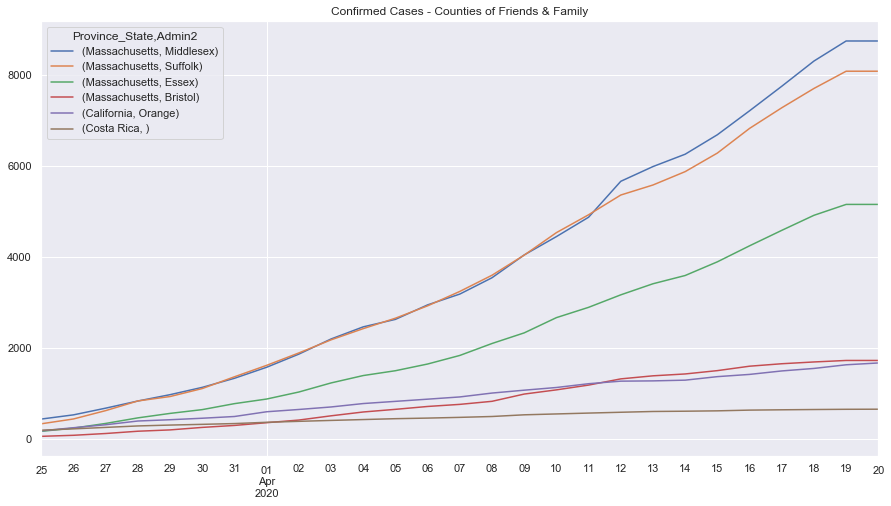

In [42]:
# Plot the data in a chart
fnf_hist_cases.loc[zoom_date3:,:].plot(title='Confirmed Cases - Counties of Friends & Family', figsize=(15,8))

#### Deaths over time in locations where friends and family live

In [43]:
# Add deaths from US Counties of friends & family
fnf_hist_deaths = jh_hist_uscounties_deaths.loc[:, fnf_counties ]

In [44]:
# Add deaths in Costa Rica from the Countries dataset
fnf_hist_deaths[('Costa Rica', '')] = jh_hist_countries_deaths['Costa Rica']

In [45]:
# Check the most recent 5 days
fnf_hist_deaths.tail()

Province_State California Massachusetts                       Costa Rica
Admin2             Orange     Middlesex Suffolk Essex Bristol           
2020-04-16             25           221     145   140      56          4
2020-04-17             28           258     164   159      63          4
2020-04-18             32           294     188   178      75          4
2020-04-19             32           372     236   209      87          5
2020-04-20             33           372     236   209      87          6

In [46]:
# Sort in descending order
fnf_hist_deaths.sort_values(jh_hist_date, axis=1, ascending=False, inplace=True)

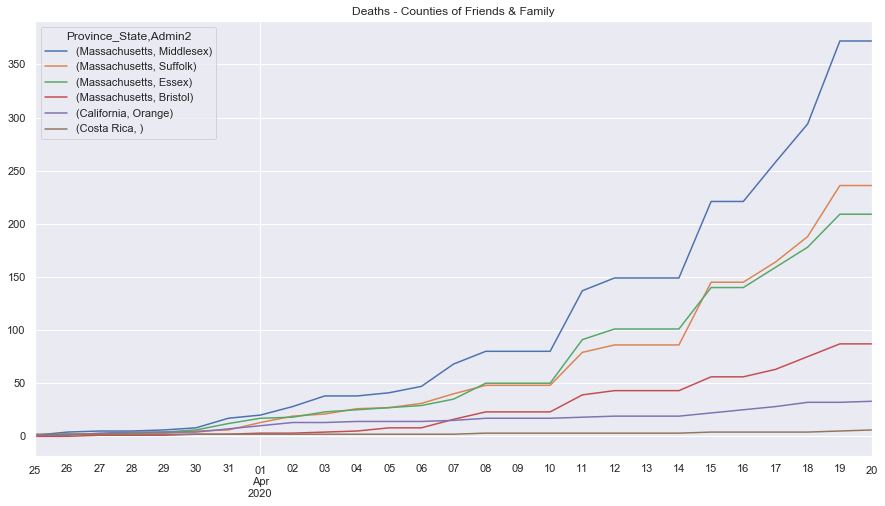

In [47]:
# Plot the data in a chart
fnf_hist_deaths.loc[zoom_date3:,:].plot(title='Deaths - Counties of Friends & Family', figsize=(15,8))